In [1]:
import pandas as pd 
import numpy as np 
from skimage.io import imread 
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import train_test_split 

from sklearn.metrics import accuracy_score 
from tqdm import tqdm 

import torch 
from torch.autograd import Variable 
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [2]:
import torchvision 
import torchvision.transforms as transforms
from torchvision import datasets

In [3]:
transform = transforms.Compose([transforms.ToTensor(), 
transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),

])

#transform = transforms.Compose([transforms.ToTensor()])
            
batch_size = 32

trainset = datasets.ImageFolder('/home/dh26/Documents/Carla/gym-carla/images_weather/Training_Set', transform = transform)
testset = datasets.ImageFolder('/home/dh26/Documents/Carla/gym-carla/images_weather/Testing_Set', transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)

classes = ('Cloudy','Dry','HeavyRain','LightRain')

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.axis('off')
    plt.show()

In [5]:
dataiter = iter(trainloader)

In [6]:
images,labels = dataiter.next()

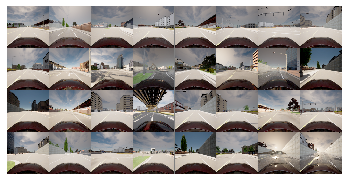

In [7]:
imshow(torchvision.utils.make_grid(images))

In [8]:
images.shape

torch.Size([32, 3, 369, 369])

In [9]:
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Dry   HeavyRain Cloudy Cloudy Cloudy Cloudy Cloudy Cloudy LightRain LightRain LightRain HeavyRain Cloudy LightRain HeavyRain Dry   Dry   LightRain Cloudy LightRain Cloudy Cloudy LightRain Dry   Dry   Cloudy LightRain Dry   Dry   LightRain HeavyRain HeavyRain


In [24]:
import torch.nn as nn
import torch.nn.functional as F 

class downConv(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,64,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(64,128,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(128,256,3)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(256,512,3)
        #self.conv5 = nn.MaxPool2d(128,256,5)
        self.fc1 = nn.Linear(288,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 

In [12]:
net = downConv()
import torch.optim as optim 

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [21]:
import torch
torch.cuda.empty_cache()

In [23]:
print('Training Started.....')
if torch.cuda.is_available():
    model = net.cuda()
    criterion = criterion.cuda()

n_epoch = 15


losses = []
avg_losses = []
for epoch in range(n_epoch):
    print('Continuing...')
    running_loss=0.0
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs,labels = inputs.cuda(), labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        losses.append(loss)
        avg_losses.append(sum(losses)/len(losses))
        if i % 2000 == 1999:
            print('f[{epoch + i}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss=0.0
# plt.plot(losses, label = 'Training Loss')
# plt.show()
fig, ax = plt.subplots()
ax.plot(losses, label='Loss', color='blue')
ax.plot(avg_losses,color='red', lw=4, ls='--', label="average plot")
plt.legend(loc=0)
plt.show()
print('Finished Training')

Training Started.....
Continuing...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x225792 and 288x120)